A Comparison between Classification Models for the Diabetes Problem

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn

In [22]:
df = pd.read_csv("../../Datasets/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
x = df.drop("Outcome", axis=1)
y = df["Outcome"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

Training and Testing with Logisitic Regression

In [24]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
y_predict_lg = logistic_regression.predict(x_test)

Text(95.72222222222221, 0.5, 'Actual')

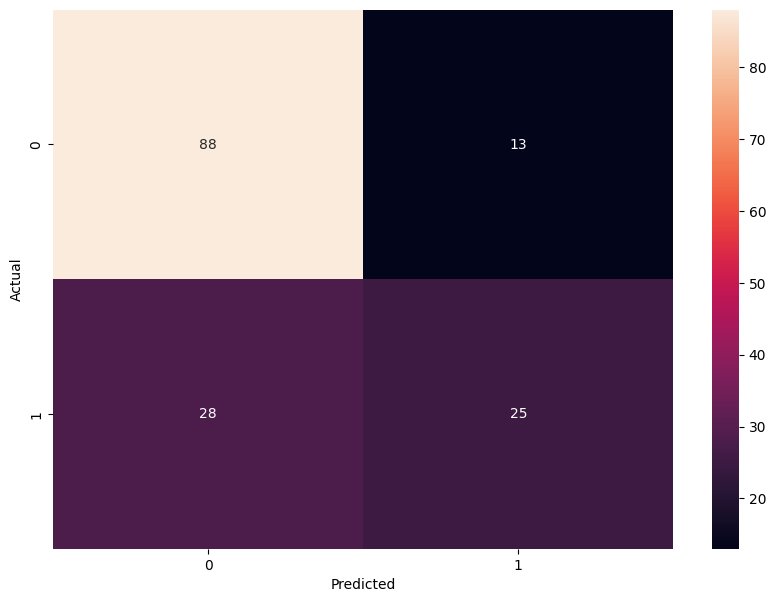

In [26]:
cm = confusion_matrix(y_test, y_predict_lg)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [27]:
accuracy_lg = accuracy_score(y_test, y_predict_lg)
accuracy_lg

0.7337662337662337

Training and Testing with SVM

In [28]:
svm = SVC()
svm.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [29]:
y_predict_svm = svm.predict(x_test)

Text(50.722222222222214, 0.5, 'Actual')

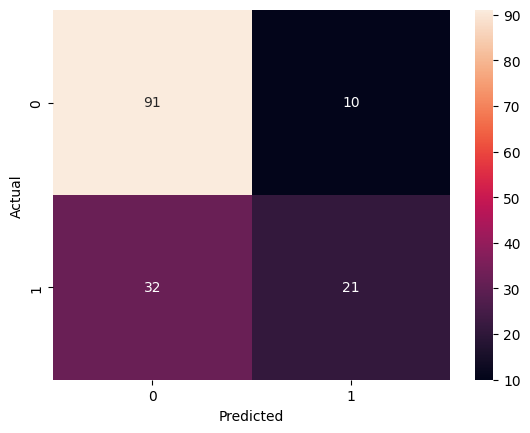

In [30]:
cm = confusion_matrix(y_test, y_predict_svm)
plt.Figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [31]:
accuracy_svm = accuracy_score(y_test, y_predict_svm)
accuracy_svm

0.7272727272727273

Testing and Training with Naive Bayes

In [32]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [33]:
y_predict_nb = naive_bayes.predict(x_test)

Text(50.722222222222214, 0.5, 'Actual')

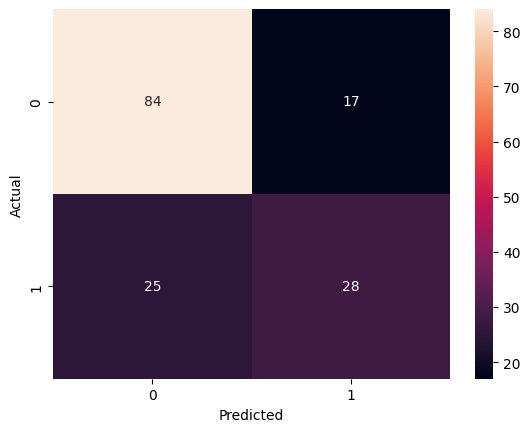

In [34]:
cm = confusion_matrix(y_test, y_predict_nb)
plt.Figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [35]:
accuracy_nb = accuracy_score(y_test, y_predict_nb)
accuracy_nb

0.7272727272727273

Training and Testing with Random Forest

In [53]:
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(x_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
y_predict_rf = random_forest.predict(x_test)

Text(50.722222222222214, 0.5, 'Actual')

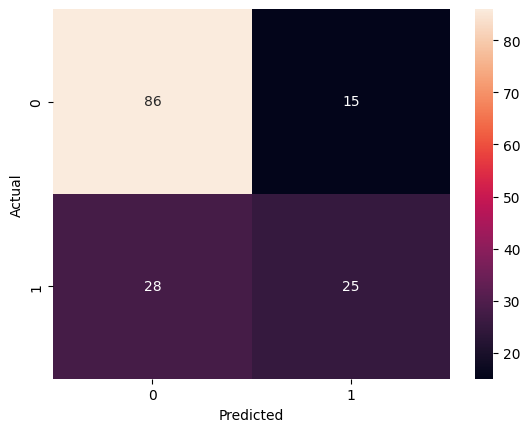

In [55]:
cm = confusion_matrix(y_test, y_predict_rf)
plt.Figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [56]:
accuracy_rf = accuracy_score(y_test, y_predict_rf)
accuracy_rf

0.7207792207792207

Comparing the Models

<Axes: xlabel='models'>

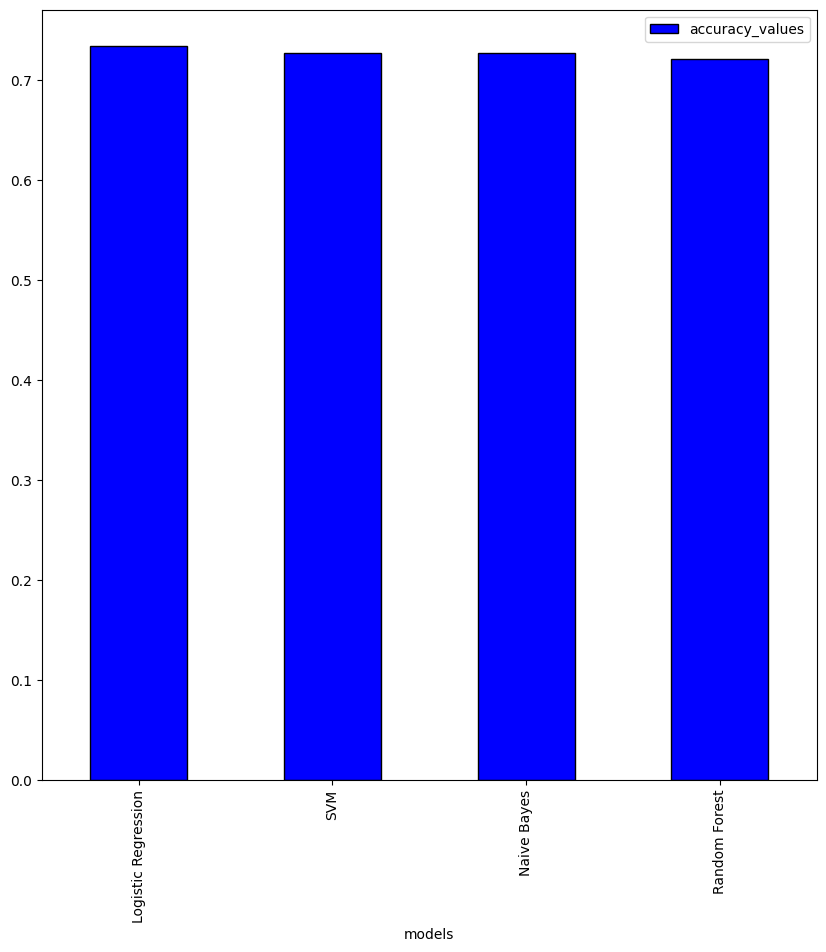

In [58]:
df_models = pd.DataFrame(
    {
        "models": ["Logistic Regression", "SVM", "Naive Bayes", "Random Forest"],
        "accuracy_values": [accuracy_lg, accuracy_svm, accuracy_nb, accuracy_rf]
    }
)

df_models.plot(kind="bar", x="models", color="blue", edgecolor="black", figsize=(10, 10))